In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"E:\Jupyter Notebooks\data_science_job.csv")

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [22]:
df.shape

(19158, 13)

In [4]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [12]:
df.isnull().mean()*100 # this gives the percent of null values in each col

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [6]:
# complete case analysis (i.e. removing the entire rows where values were missing) is done when
# the data is MCAR (Missing Completely At Random) and less than 5% values are missing in the column.

In [10]:
(df.isnull().mean()*100).index

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'training_hours', 'target'],
      dtype='object')

In [11]:
for i in (df.isnull().mean()*100).index:
    print(i)

enrollee_id
city
city_development_index
gender
relevent_experience
enrolled_university
education_level
major_discipline
experience
company_size
company_type
training_hours
target


In [15]:
cols = [col for col in (df.isnull().mean()*100).index if (df.isnull().mean()*100)[col] < 5 and (df.isnull().mean()*100)[col] >0]

In [16]:
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [19]:
# easier syntax for the above code
cols = [col for col in df.columns if df[col].isnull().mean() < 0.05 and df[col].isnull().mean() >0]

In [20]:
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [21]:
df[cols]

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
3,0.789,NaN,Graduate,0.0,52.0
4,0.767,no_enrollment,Masters,20.0,8.0
...,...,...,...,...,...
19153,0.878,no_enrollment,Graduate,14.0,42.0
19154,0.920,no_enrollment,Graduate,14.0,52.0
19155,0.920,no_enrollment,Graduate,20.0,44.0
19156,0.802,no_enrollment,High School,0.0,97.0


In [23]:
df[cols].shape

(19158, 5)

checking below , if we drop the null rows, how much percent of total data (total rows are left with us)

In [24]:
len(df)

19158

In [27]:
len(df[cols].dropna())

17182

In [30]:
# percent of data left or obtained after removing null valued rows, with <5per null values
len(df[cols].dropna())/len(df)

0.8968577095730244

Dropping null values of selected columns

In [31]:
newdf = df[cols].dropna()

In [32]:
newdf.shape

(17182, 5)

In [33]:
newdf

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
4,0.767,no_enrollment,Masters,20.0,8.0
5,0.764,Part time course,Graduate,11.0,24.0
...,...,...,...,...,...
19153,0.878,no_enrollment,Graduate,14.0,42.0
19154,0.920,no_enrollment,Graduate,14.0,52.0
19155,0.920,no_enrollment,Graduate,20.0,44.0
19156,0.802,no_enrollment,High School,0.0,97.0


#### To validate if the dropping of null values (complete case analysis - analysing only those rows which have all values filled i.e. no null values), was correct for the data

##### for numerical columns

In [34]:
# check if the distributions before and after clearly overlaps 
# or if there are differences in distributions then there is problem applying this method

In [37]:
newdf.columns

Index(['city_development_index', 'enrolled_university', 'education_level',
       'experience', 'training_hours'],
      dtype='object')

In [36]:
newdf.select_dtypes('number').columns

Index(['city_development_index', 'experience', 'training_hours'], dtype='object')

Usage of density:
density=False (default): The histogram will display the counts (frequencies) of the data points in each bin.
density=True: The histogram will display the probability density, such that the area under the histogram will sum to 1. This means the height of each bar represents the probability of data points falling into that bin, and the total area of the histogram equals 1.

Why Use density=True?
Using density=True can be useful in several scenarios:

Comparing Different Sample Sizes:

Suppose you have two datasets with different sample sizes, but you want to compare their distributions. Plotting raw counts may be misleading because larger datasets will naturally have higher bars. Using probability density normalizes the histograms, making them comparable regardless of the sample sizes.
Understanding Probability Distributions:

When analyzing continuous data, it’s often more insightful to understand the probability of data points falling within certain ranges. The probability density gives a better sense of this than raw counts.
Overlaying Distributions:

When comparing two or more distributions on the same plot, using density allows you to overlay the histograms directly without one overshadowing the other due to differences in sample sizes.

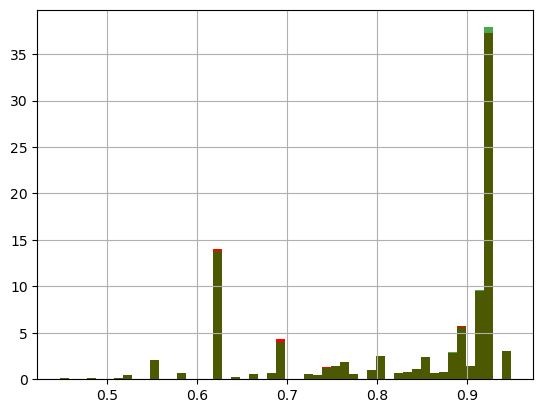

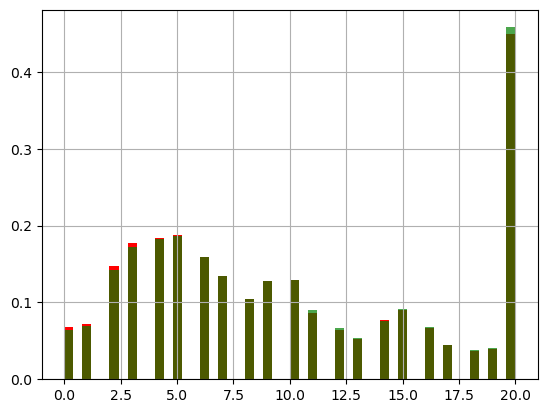

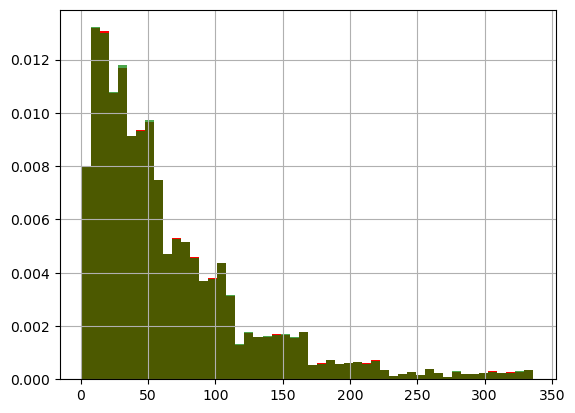

In [49]:
for col in  newdf.select_dtypes('number').columns:
    plt.figure()
    ax = plt.subplot(111)
    
    df[col].hist(density=True, color = "red", ax = ax, bins = 50)
    newdf[col].hist(color = 'green', alpha = 0.7, ax = ax, density = True, bins = 50)



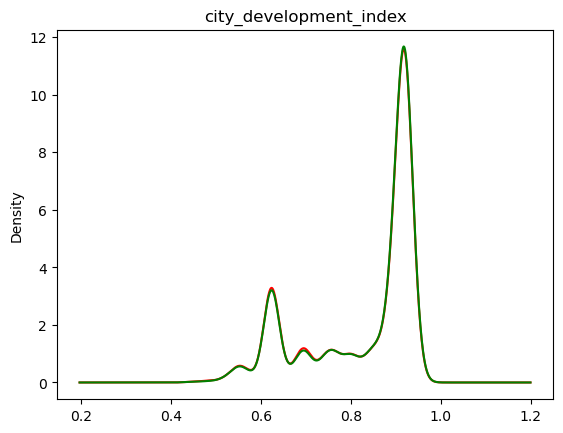

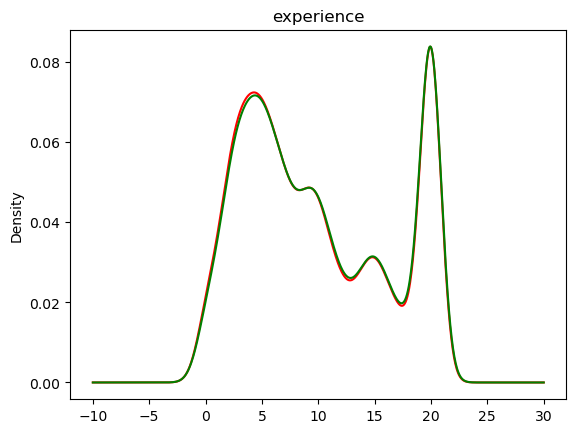

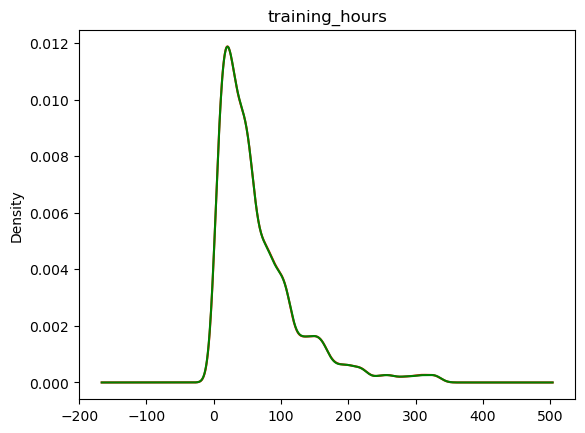

In [51]:
for col in  newdf.select_dtypes('number').columns:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    df[col].plot.density(color = "red")
    newdf[col].plot.density(color = 'green')
    plt.title(col)

The distributions are more or less the same

##### for categorical columns

In [52]:
# we check if the percentage of observations per category changed much, before and after this analysis

In [53]:
newdf.select_dtypes('object').columns

Index(['enrolled_university', 'education_level'], dtype='object')

In [56]:
for col in newdf.select_dtypes('object').columns:
    obj = newdf[col].value_counts()
    print(obj)
    print()

no_enrollment       12632
Full time course     3449
Part time course     1101
Name: enrolled_university, dtype: int64

Graduate          10650
Masters            4022
High School        1845
Phd                 380
Primary School      285
Name: education_level, dtype: int64



In [58]:
for col in newdf.select_dtypes('object').columns:
    obj = newdf[col].value_counts()/len(newdf)
    print(obj)
    print()

no_enrollment       0.735188
Full time course    0.200733
Part time course    0.064079
Name: enrolled_university, dtype: float64

Graduate          0.619835
Masters           0.234082
High School       0.107380
Phd               0.022116
Primary School    0.016587
Name: education_level, dtype: float64



In [63]:
for col in  newdf.select_dtypes('object').columns:
    obj = pd.concat(
        [df[col].value_counts()/len(df),
        newdf[col].value_counts()/len(newdf)]
    ,axis = 1)
    obj.columns = ['old_df_{0}'.format(col), 'newdf_{0}'.format(col)]
    print(obj)
    print()

                  old_df_enrolled_university  newdf_enrolled_university
no_enrollment                       0.721213                   0.735188
Full time course                    0.196106                   0.200733
Part time course                    0.062533                   0.064079

                old_df_education_level  newdf_education_level
Graduate                      0.605387               0.619835
Masters                       0.227633               0.234082
High School                   0.105282               0.107380
Phd                           0.021610               0.022116
Primary School                0.016077               0.016587



From above analysis of categorical columns, we have to ensure that the distribution of values does not change category wise or per category in each of those columns,  even after removing null valued rows

And we are not taking direct values but normalising it using the lens of the respective dfs to get a clear comparision of category distribution on the basis of the total values in the two dfs.

explanations of my conclusions given by chatgpt :)

Explanation: By comparing the normalized value counts (proportions) of each category in df and newdf, you are checking if the distribution of values in each categorical column remains consistent after data cleaning or manipulation (such as removing rows with null values). This ensures that the category distribution has not been significantly altered.

Explanation: By normalizing the value counts (dividing by the total number of rows in each DataFrame), you account for the different sizes of df and newdf. This allows for a clear and fair comparison of the category distributions, irrespective of the total number of rows in each DataFrame. Normalization ensures that you are comparing proportions rather than raw counts, which can be misleading if the DataFrames have different sizes.